In [1]:
import os
import pandas as pd
from rdkit.Chem import Draw

from mi_collections.moldr.decompose import MolsMining, DefaultConfig
from mi_collections.chemutils import get_smiles, get_mol
from mi_collections.gspan.utils import gspan_to_mol

In [2]:
df = pd.read_csv("./works/moldr/data/zinc/all.txt", header=None)

# sample dataset
dataset = df.iloc[0:50]
dataset.head()

,0
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...


/usr/local/opt/pyenv/versions/miniconda3-4.7.12/envs/rdkit/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  % (maxMols))


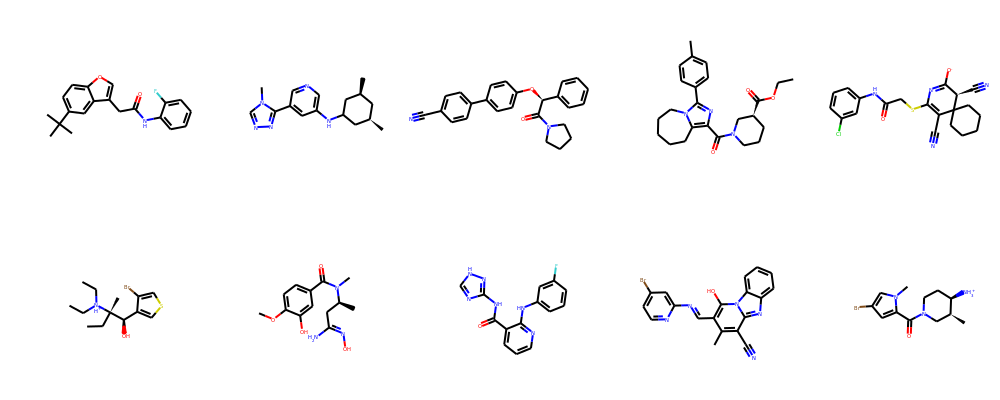

In [3]:
mols = [get_mol(s[0]) for s in dataset.values]
smiles = [get_smiles(m) for m in mols]
Draw.MolsToGridImage(mols, molsPerRow=5, maxMols=10)

In [4]:
save_dir = "outputs/building_blocks/zinc"
path_raw = os.path.join(save_dir, "zinc.data")
path_jt = os.path.join(save_dir, "zinc_jt.data")

In [5]:
from pathlib import Path

minsup = int(len(mols) * 0.1)
config = DefaultConfig(
    data_path=Path(path_jt), support=minsup, lower=2, upper=7, method="jt"
)
runner = MolsMining(config)
gspan = runner.decompose(mols)

100%|██████████| 50/50 [00:00<00:00, 137.07it/s]


save to outputs/building_blocks/zinc/zinc_jt.data
t # 0
Read:	0.0 s
Mine:	0.12 s
Total:	0.12 s


100%|██████████| 82/82 [00:00<00:00, 107.15it/s]


100%|██████████| 82/82 [00:00<00:00, 106.18it/s]
/usr/local/opt/pyenv/versions/miniconda3-4.7.12/envs/rdkit/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:188: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


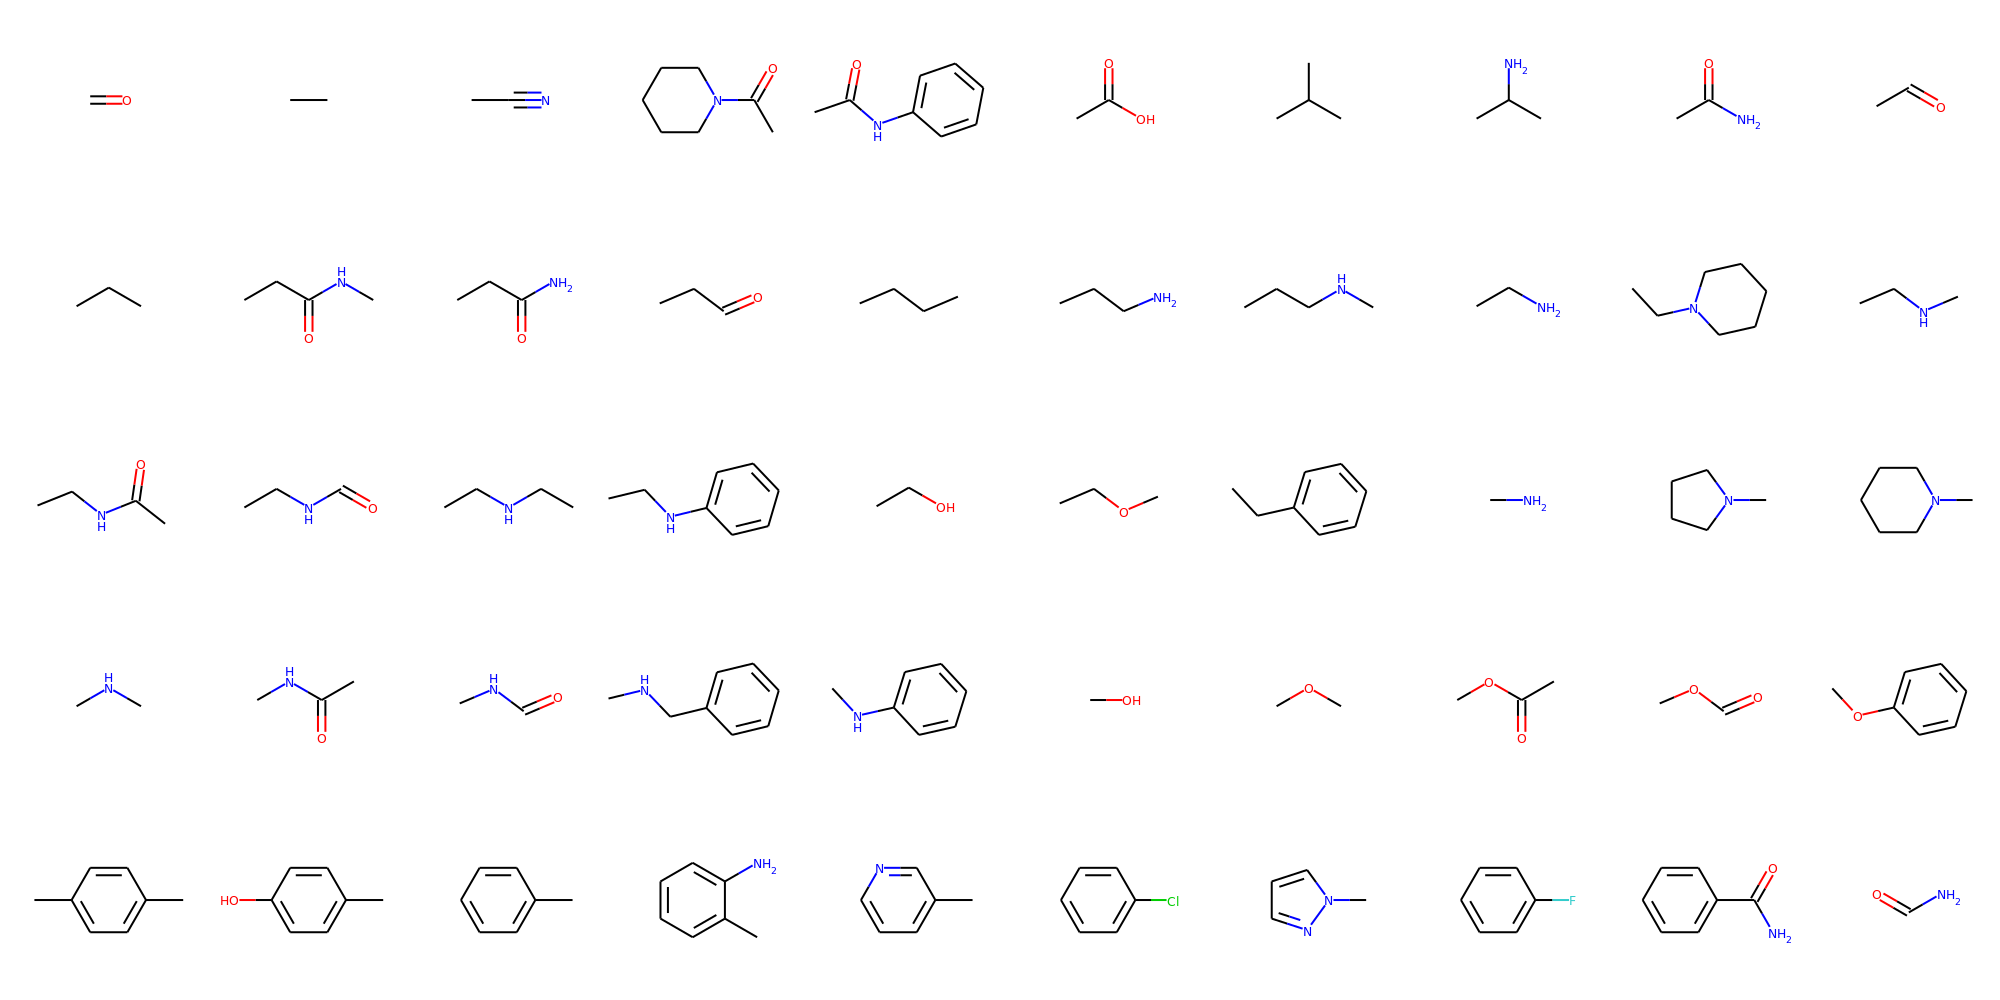

In [7]:
sub_mols = gspan_to_mol(gspan, method=config.method, smiles_list=smiles)
sub_smiles = [get_smiles(m) for m in sub_mols]
sub_mols = [get_mol(s) for s in sub_smiles]
Draw.MolsToGridImage(sub_mols, molsPerRow=10)